In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
%matplotlib inline
# %matplotlib notebook
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import random
from sklearn.metrics import accuracy_score
from sklearn import metrics
from pandas_profiling import ProfileReport

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
train = pd.read_csv('train.csv', low_memory=False)

In [5]:
test  = pd.read_csv('test.csv')

In [3]:
train.shape

(110938, 190)

In [6]:
test.shape

(72711, 189)

In [27]:
# design_report = ProfileReport(train)
# design_report.to_file(output_file='report.html')

In [244]:
train.head()

,id,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
0,11906497,away,Newell's Old Boys,River Plate,2019-12-01 00:45:00,Superliga,636,False,468196.0,468200.0,...,1122.0,642.0,636.0,636.0,636.0,1122.0,636.0,642.0,636.0,1122.0
1,11984383,home,Real Estelí,Deportivo Las Sabanas,2019-12-01 01:00:00,Primera Division,752,False,516788.0,22169161.0,...,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0
2,11983301,draw,UPNFM,Marathón,2019-12-01 01:00:00,Liga Nacional,734,False,2510608.0,456313.0,...,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0
3,11983471,away,León,Morelia,2019-12-01 01:00:00,Liga MX,743,False,1552508.0,465797.0,...,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,746.0,743.0
4,11883005,home,Cobán Imperial,Iztapa,2019-12-01 01:00:00,Liga Nacional,705,False,429958.0,426870.0,...,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0


#### Descriptive columns

In [3]:
# nullvalues = train.loc[:, train.isnull().any()].isnull().sum().sort_values(ascending=False)

# nullvalues.to_dict()

{'away_team_history_coach_10': 27129,
 'home_team_history_coach_10': 26653,
 'away_team_history_coach_9': 26150,
 'home_team_history_coach_9': 25733,
 'away_team_history_coach_8': 25219,
 'home_team_history_coach_8': 24869,
 'away_team_history_coach_7': 24377,
 'home_team_history_coach_7': 23980,
 'away_team_history_coach_6': 23525,
 'home_team_history_coach_6': 23258,
 'away_team_history_coach_5': 22855,
 'home_team_history_coach_5': 22602,
 'away_team_history_coach_4': 22294,
 'home_team_history_coach_4': 22118,
 'away_team_history_coach_3': 21949,
 'away_team_coach_id': 21815,
 'home_team_history_coach_3': 21733,
 'home_team_coach_id': 21721,
 'away_team_history_coach_2': 21696,
 'away_team_history_coach_1': 21641,
 'home_team_history_coach_2': 21571,
 'home_team_history_coach_1': 21523,
 'away_team_history_is_cup_10': 14819,
 'away_team_history_rating_10': 14223,
 'away_team_history_opponent_rating_10': 14223,
 'away_team_history_goal_10': 14216,
 'away_team_history_match_date_10':

In [6]:
train = train[~train.isnull().any(axis=1)]
train
# train[~train.isnull().any(axis=1)]

,id,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
0,11906497,away,Newell's Old Boys,River Plate,2019-12-01 00:45:00,Superliga,636,False,468196.0,468200.0,...,1122.0,642.0,636.0,636.0,636.0,1122.0,636.0,642.0,636.0,1122.0
1,11984383,home,Real Estelí,Deportivo Las Sabanas,2019-12-01 01:00:00,Primera Division,752,False,516788.0,22169161.0,...,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0
2,11983301,draw,UPNFM,Marathón,2019-12-01 01:00:00,Liga Nacional,734,False,2510608.0,456313.0,...,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0
3,11983471,away,León,Morelia,2019-12-01 01:00:00,Liga MX,743,False,1552508.0,465797.0,...,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,746.0,743.0
4,11883005,home,Cobán Imperial,Iztapa,2019-12-01 01:00:00,Liga Nacional,705,False,429958.0,426870.0,...,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110932,17948949,away,New York RB II,Hartford Athletic,2021-04-30 23:00:00,USL Championship,791,False,2511000.0,3645.0,...,791.0,791.0,791.0,791.0,791.0,791.0,791.0,791.0,791.0,791.0
110934,18030096,away,Royal Pari,Oriente Petrolero,2021-04-30 23:00:00,Liga De Futbol Prof,1098,False,465833.0,16488543.0,...,1098.0,1098.0,1098.0,1098.0,1098.0,1098.0,1098.0,1098.0,1098.0,1098.0
110935,17715497,draw,São Bernardo,Água Santa,2021-04-30 23:00:00,Paulista A2,1314,False,8416491.0,528562.0,...,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1746.0,1746.0
110936,17944153,away,Everton,La Serena,2021-05-01 00:00:00,Primera Division,663,False,6973085.0,471757.0,...,663.0,663.0,663.0,663.0,663.0,663.0,663.0,663.0,663.0,663.0


In [30]:
# train[home_team_history].info()

In [31]:
# train[away_team_history].info()

In [32]:
# train[descr].describe()

In [33]:
# train[home_team_history].describe()

In [16]:
train['date'] = pd.to_datetime(train['match_date'])
datees = [i for i in train.columns if 'match_date' in i]

# train['date'].min()
datees
# train['match_date']

['match_date',
 'home_team_history_match_date_1',
 'home_team_history_match_date_2',
 'home_team_history_match_date_3',
 'home_team_history_match_date_4',
 'home_team_history_match_date_5',
 'home_team_history_match_date_6',
 'home_team_history_match_date_7',
 'home_team_history_match_date_8',
 'home_team_history_match_date_9',
 'home_team_history_match_date_10',
 'away_team_history_match_date_1',
 'away_team_history_match_date_2',
 'away_team_history_match_date_3',
 'away_team_history_match_date_4',
 'away_team_history_match_date_5',
 'away_team_history_match_date_6',
 'away_team_history_match_date_7',
 'away_team_history_match_date_8',
 'away_team_history_match_date_9',
 'away_team_history_match_date_10']

In [21]:
for i in train:
    if 'match_date' in i:
        try:
            train[i] = pd.to_datetime(train[i]).dt.month.astype(int)        
        except:
            continue

In [22]:
train[datees] = train[datees].fillna(np.random.choice(list(range(1,13))))  

In [23]:
train[datees]

,match_date,home_team_history_match_date_1,home_team_history_match_date_2,home_team_history_match_date_3,home_team_history_match_date_4,home_team_history_match_date_5,home_team_history_match_date_6,home_team_history_match_date_7,home_team_history_match_date_8,home_team_history_match_date_9,...,away_team_history_match_date_1,away_team_history_match_date_2,away_team_history_match_date_3,away_team_history_match_date_4,away_team_history_match_date_5,away_team_history_match_date_6,away_team_history_match_date_7,away_team_history_match_date_8,away_team_history_match_date_9,away_team_history_match_date_10
0,1,11,11,11,10,10,10,9,9,9,...,11,11,11,11,10,10,10,10,10,10
1,1,11,11,11,11,10,10,10,10,10,...,11,11,11,11,10,10,10,9,9,9
2,1,11,11,11,10,10,10,10,9,9,...,11,11,10,10,10,10,10,9,9,9
3,1,11,11,11,11,11,10,10,10,9,...,11,11,11,11,11,10,10,10,10,9
4,1,11,11,11,11,10,10,10,10,10,...,11,11,11,11,10,10,10,10,10,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110933,1,4,4,12,12,12,11,11,11,11,...,4,4,2,2,12,12,12,11,11,11
110934,1,4,4,4,3,3,3,2,12,12,...,4,4,4,3,3,12,12,12,12,12
110935,1,4,4,4,4,3,3,3,2,12,...,4,4,4,4,3,3,3,2,12,12
110936,1,4,4,4,4,3,2,2,2,1,...,4,4,4,4,3,2,2,2,1,1


In [35]:
# train[train["is_cup"].notnull()]

In [36]:
# train[descr].info()

In [37]:
# train[home_team_history].info()

In [38]:
# train[away_team_history].info()

In [104]:
cols = [i for i in train.columns if (not 'history_league_id_' in i) and (not '_team_history_coach_' in i)]
# cols = [i for i in train.columns if not 'history_league_id_' in i]
train = train[cols]
train.shape
# len(cols)

(110938, 151)

In [58]:
train['league_name'].value_counts()

Premier League              3308
Club Friendlies             2098
Primera Division            1790
Championship                1039
Serie A                      949
                            ... 
National Football League       1
Paulista Série B               1
Srpska Liga - East             1
Catarinense 2                  1
Division Intermedia            1
Name: league_name, Length: 525, dtype: int64

In [59]:
train['league_id'].value_counts()

1101    2098
9        835
14       744
12       702
567      663
        ... 
1385       1
1161       1
1249       1
1435       1
761        1
Name: league_id, Length: 623, dtype: int64

In [11]:
train['league_name'].value_counts().keys()

Int64Index([ 13, 301,   2,  15,  76,  93, 174, 192,   1,  58,
            ...
            561, 681, 682,   0, 684, 687, 286, 265, 651, 652],
           dtype='int64', length=728)

ID Re-generate

In [10]:
train['league_name'] = pd.factorize(train['league_name'])[0]+1

In [13]:
train['league_name'].value_counts()

13     5565
301    3724
2      2369
15     1530
76     1327
       ... 
687       1
286       1
265       1
651       1
652       1
Name: league_name, Length: 728, dtype: int64

In [38]:
# train.drop('league_name', axis=1, inplace=True)

In [46]:
# for i, name in list(temp[['league_id', 'league_name']].value_counts().keys().sort_values(ascending=True)):
#     print(str(i) + ' : ' + name, end=' | ')

In [111]:
train.shape

(64117, 198)

In [48]:
# train.loc[(train['is_cup']  == True) & (train['home_team_history_is_cup_1'] == 0.0 )][['is_cup','away_team_history_is_cup_1','home_team_history_is_cup_2','home_team_history_is_cup_3','home_team_history_is_cup_4','home_team_history_is_cup_5','home_team_history_is_cup_6',]]

,is_cup,away_team_history_is_cup_1,home_team_history_is_cup_2,home_team_history_is_cup_3,home_team_history_is_cup_4,home_team_history_is_cup_5,home_team_history_is_cup_6
260,True,0.0,0.0,0.0,0.0,0.0,0.0
271,True,0.0,0.0,0.0,0.0,1.0,1.0
434,True,0.0,1.0,1.0,1.0,0.0,0.0
440,True,1.0,0.0,1.0,1.0,0.0,1.0
441,True,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
110680,True,0.0,1.0,0.0,0.0,1.0,0.0
110725,True,0.0,0.0,0.0,0.0,NaN,NaN
110726,True,NaN,0.0,0.0,0.0,NaN,NaN
110745,True,0.0,0.0,0.0,0.0,1.0,1.0


In [14]:
target = {
    'home': 1,
    'away': 2,
    'draw': 3,
}

train['target'] = train['target'].map(target)
train['target']

0         2
1         1
2         3
3         2
4         1
         ..
110932    2
110934    2
110935    3
110936    2
110937    1
Name: target, Length: 64117, dtype: int64

In [28]:
home_team_history = []
away_team_history = []
descr = []
for j in list(train.columns):
    if 'home_team_history' in j:
        home_team_history.append(j)        
    elif 'away_team_history' in j:
        away_team_history.append(j)
    else:
        descr.append(j)        
len(descr + home_team_history + away_team_history)        

191

In [110]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [11]:
# train = train[train['is_cup'].notna()]
# train.shape

(64117, 169)

In [113]:
train["is_cup"] = train["is_cup"].astype(int)

In [112]:
missing_values_table(train)

Your selected dataframe has 198 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [59]:
goal = [i for i in train.columns if 'goal' in i]
# goal

In [60]:
for i in train:
    if 'goal' in i:
        train[i] = train[i].fillna(0)

In [57]:
home_rating_columns = [c for c in train if 'home_team_history_rating' in c]
home_opponent_rating_columns = [c for c in train if 'home_team_history_opponent_rating_' in c]
away_rating_columns = [c for c in train if 'away_team_history_rating' in c]
away_opponent_rating_columns = [c for c in train if 'away_team_history_opponent_rating_' in c]

In [58]:
for r in [home_rating_columns, home_opponent_rating_columns, away_rating_columns, away_opponent_rating_columns]:
    for i in train[r]:
        train[i] = train[i].fillna(value=train[r][i].mean())        

In [59]:
# train.loc[(train['is_cup']  == True) & (train['home_team_history_is_cup_1'] == 0.0 )][['is_cup','away_team_history_is_cup_1','home_team_history_is_cup_2','home_team_history_is_cup_3','home_team_history_is_cup_4','home_team_history_is_cup_5','home_team_history_is_cup_6',]]

In [60]:
all_is_cup = [i for i in train if 'history_is_cup' in i]

train[all_is_cup] = train[all_is_cup].fillna(value=np.random.choice(train['is_cup']))

In [61]:
home_history_coach = [h for h in train if 'home_team_history_coach' in h]
away_history_coach = [a for a in train if 'away_team_history_coach_' in a]

In [1]:
# train[home_history_coach] = train[home_history_coach].fillna(value=np.random.choice(train['home_team_coach_id']))
# train[away_history_coach] = train[away_history_coach].fillna(value=np.random.choice(train['away_team_coach_id']))
# train['away_team_coach_id'] = train['away_team_coach_id'].fillna(0)
# train['home_team_coach_id'] = train['home_team_coach_id'].fillna(0)
np.random.choice(train['home_team_coach_id'])

NameError: name 'np' is not defined

In [2]:
is_play_home = [i for i in train.columns if 'is_play_home' in i]
train[is_play_home] = train[is_play_home].fillna(np.random.choice([0, 1.0])) 
train[is_play_home] 

NameError: name 'train' is not defined

In [29]:
missing_values_table(train[home_team_history])

Your selected dataframe has 90 columns.
There are 70 columns that have missing values.


,Missing Values,% of Total Values
home_team_history_coach_10,26653,24.0
home_team_history_coach_9,25733,23.2
home_team_history_coach_8,24869,22.4
home_team_history_coach_7,23980,21.6
home_team_history_coach_6,23258,21.0
...,...,...
home_team_history_rating_1,1171,1.1
home_team_history_opponent_rating_1,1171,1.1
home_team_history_league_id_1,1159,1.0
home_team_history_goal_1,1159,1.0


In [74]:
missing_values_table(train[away_team_history])

Your selected dataframe has 70 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [31]:
teams = dict.fromkeys(list(train['home_team_name'].value_counts().keys()) + list(train['away_team_name'].value_counts().keys()))
dic = {}
for i, team in enumerate(teams):
    dic[team] = i

In [32]:
train['home_team_name']=train['home_team_name'].map(dic)
train['away_team_name']=train['away_team_name'].map(dic)

In [33]:
train['away_team_name'].value_counts()

0.0        82
1.0        77
3.0        65
2.0        64
4.0        64
           ..
8712.0      1
8301.0      1
10213.0     1
8332.0      1
8977.0      1
Name: away_team_name, Length: 9892, dtype: int64

In [134]:
data = ['target'] + home_team_history + away_team_history
print(data)
corr = train.iloc[:,0:30].corr().replace(1, np.NaN).abs()

max_list = []
for i in range(0,100):
    max_val = max(corr.max())
    max_list.append((max_val, corr.columns[np.where(corr == max_val)[0][:]][0],
                    corr.columns[np.where(corr == max_val)[0][:]][1]))
    corr.replace(max_val, np.NaN, inplace=True)


NameError: name 'home_team_history' is not defined

In [76]:
max_list

[(0.4385850702811064,
  'home_team_history_is_play_home_8',
  'home_team_history_is_play_home_9'),
 (0.43505041624283197,
  'home_team_history_is_play_home_7',
  'home_team_history_is_play_home_8'),
 (0.4325939306332451,
  'home_team_history_is_play_home_9',
  'home_team_history_is_play_home_10'),
 (0.4296696182447896,
  'home_team_history_is_play_home_4',
  'home_team_history_is_play_home_5'),
 (0.42606532103559097,
  'home_team_history_is_play_home_6',
  'home_team_history_is_play_home_7'),
 (0.4246288174687052,
  'home_team_history_is_play_home_2',
  'home_team_history_is_play_home_3'),
 (0.4234060079322376,
  'home_team_history_is_play_home_5',
  'home_team_history_is_play_home_6'),
 (0.4207265271346516,
  'home_team_history_is_play_home_3',
  'home_team_history_is_play_home_4'),
 (0.40611011992183416,
  'home_team_history_is_play_home_1',
  'home_team_history_is_play_home_2'),
 (0.24411237697757673, 'is_cup', 'home_team_history_is_cup_2'),
 (0.23427448445863755,
  'home_team_histo

In [77]:
[home_rating_columns, home_opponent_rating_columns, away_rating_columns, away_opponent_rating_columns]

NameError: name 'home_rating_columns' is not defined

In [78]:
# train[['target', 'home_team_coach_id', 'is_cup', 'away_team_coach_id'] + home_rating_columns + home_opponent_rating_columns + away_rating_columns + away_opponent_rating_columns].corr()

In [129]:
for i in train:
    if 'match_date' in i:
        try:
            train[i] = pd.to_datetime(train[i]).dt.month.astype(int)
        except:
            pass

In [60]:
# sns.barplot(train['target'].value_counts().keys(), train['target'].value_counts())
# plt.show()
list(train.columns)

['id',
 'target',
 'home_team_name',
 'away_team_name',
 'match_date',
 'league_name',
 'league_id',
 'is_cup',
 'home_team_coach_id',
 'away_team_coach_id',
 'home_team_history_match_date_1',
 'home_team_history_match_date_2',
 'home_team_history_match_date_3',
 'home_team_history_match_date_4',
 'home_team_history_match_date_5',
 'home_team_history_match_date_6',
 'home_team_history_match_date_7',
 'home_team_history_match_date_8',
 'home_team_history_match_date_9',
 'home_team_history_match_date_10',
 'home_team_history_is_play_home_1',
 'home_team_history_is_play_home_2',
 'home_team_history_is_play_home_3',
 'home_team_history_is_play_home_4',
 'home_team_history_is_play_home_5',
 'home_team_history_is_play_home_6',
 'home_team_history_is_play_home_7',
 'home_team_history_is_play_home_8',
 'home_team_history_is_play_home_9',
 'home_team_history_is_play_home_10',
 'home_team_history_is_cup_1',
 'home_team_history_is_cup_2',
 'home_team_history_is_cup_3',
 'home_team_history_is_cup_

In [101]:
away_team_history_goal = [i for i in train.columns if 'away_team_history_goal' in i]
away_team_history_opponent_goal = [i for i in train.columns if 'away_team_history_opponent_goal' in i]
away_team_history_rating = [i for i in train.columns if 'away_team_history_rating' in i]
away_team_history_opponent_rating = [i for i in train.columns if 'away_team_history_opponent_rating' in i]

home_team_history_goal = [i for i in train.columns if 'home_team_history_goal' in i]
home_team_history_opponent_goal = [i for i in train.columns if 'home_team_history_opponent_goal' in i]
home_team_history_rating = [i for i in train.columns if 'home_team_history_rating' in i]
home_team_history_opponent_rating = [i for i in train.columns if 'home_team_history_opponent_rating' in i]

train['home_goal'] = train[home_team_history_goal].sum(axis=1)
train['home_opp_goal'] = train[home_team_history_opponent_goal].sum(axis=1)
train['home_rating'] = train[home_team_history_rating].std(axis=1)
train['home_opp_rating'] = train[home_team_history_opponent_rating].std(axis=1)

train['away_goal'] = train[away_team_history_goal].sum(axis=1)
train['away_opp_goal'] = train[away_team_history_opponent_goal].sum(axis=1)
train['away_rating'] = train[away_team_history_rating].std(axis=1)
train['away_opp_rating'] = train[away_team_history_opponent_rating].std(axis=1)

In [102]:
train[['target']+ home_team_history_goal]

,target,home_team_history_goal_1,home_team_history_goal_2,home_team_history_goal_3,home_team_history_goal_4,home_team_history_goal_5,home_team_history_goal_6,home_team_history_goal_7,home_team_history_goal_8,home_team_history_goal_9,home_team_history_goal_10
0,2,0.0,2.0,0.0,0.0,3.0,0.0,1.0,2.0,1.0,4.0
1,1,0.0,0.0,4.0,0.0,0.0,2.0,0.0,2.0,1.0,0.0
2,3,3.0,2.0,2.0,1.0,0.0,2.0,4.0,3.0,1.0,1.0
3,2,3.0,2.0,4.0,1.0,0.0,3.0,2.0,1.0,1.0,1.0
4,1,1.0,3.0,2.0,2.0,1.0,3.0,3.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
110932,2,0.0,0.0,5.0,1.0,6.0,0.0,3.0,1.0,1.0,1.0
110934,2,1.0,3.0,3.0,4.0,8.0,1.0,1.0,3.0,1.0,1.0
110935,3,1.0,1.0,2.0,1.0,1.0,0.0,1.0,2.0,0.0,1.0
110936,2,1.0,0.0,1.0,2.0,1.0,1.0,0.0,1.0,1.0,2.0


In [103]:
train.loc[:100].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 99
Columns: 198 entries, id to away_opp_rating
dtypes: float64(170), int64(3), object(25)
memory usage: 88.6+ KB


In [104]:
train[['target', 'home_goal']].corr()

,target,home_goal
target,1.000000,-0.114687
home_goal,-0.114687,1.000000


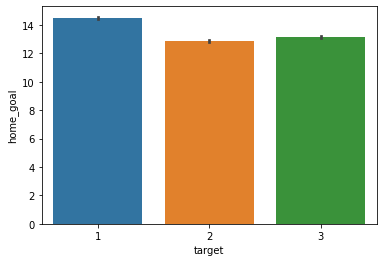

In [105]:
sns.barplot(x='target',  y='home_goal', data=train)          
plt.show()

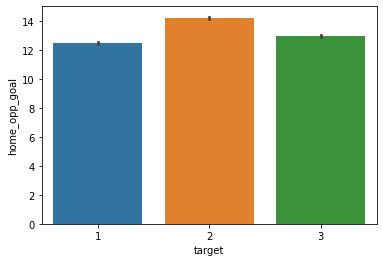

In [94]:
# plt.figure(figsize=(6, 7))
sns.barplot(x='target',  y='home_opp_goal', data=train)          
plt.show()

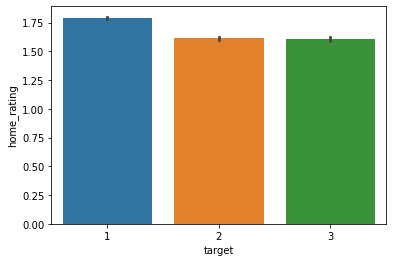

In [132]:
# plt.figure(figsize=(6, 7))
sns.barplot(x='target',  y='home_rating', data=train)          
plt.show()

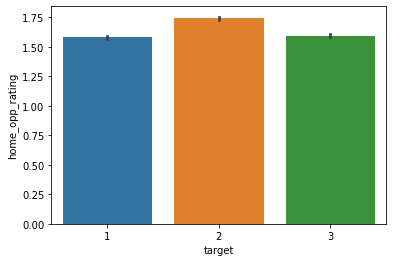

In [107]:
sns.barplot(x='target',  y='home_opp_rating', data=train)          
plt.show()

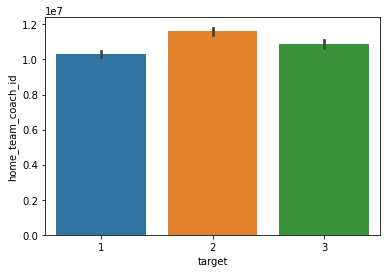

In [99]:
sns.barplot(x='target',  y='home_team_coach_id', data=train)          
plt.show()

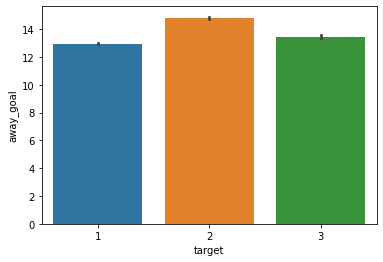

In [88]:
sns.barplot(x='target',  y='away_goal', data=train)          
plt.show()

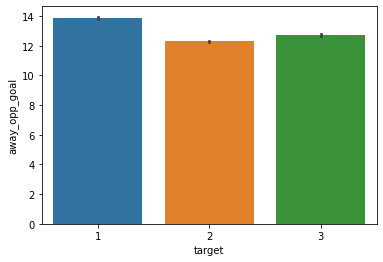

In [89]:
sns.barplot(x='target',  y='away_opp_goal', data=train)          
plt.show()

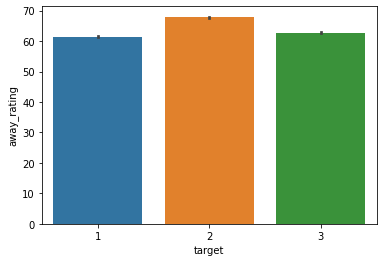

In [90]:
sns.barplot(x='target',  y='away_rating', data=train)          
plt.show()

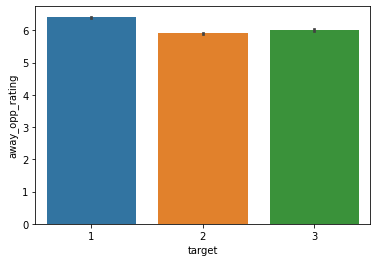

In [100]:
sns.barplot(x='target',  y='away_opp_rating', data=train)          
plt.show()

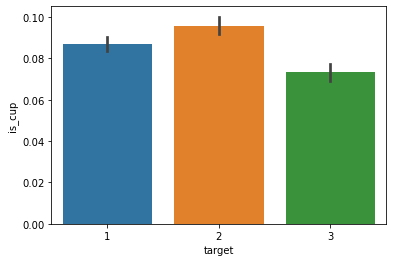

In [126]:
sns.barplot(x='target',  y='is_cup', data=train)          
plt.show()

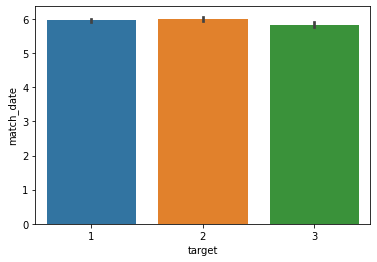

In [133]:
sns.barplot(x='target',  y='match_date', data=train)          
plt.show()

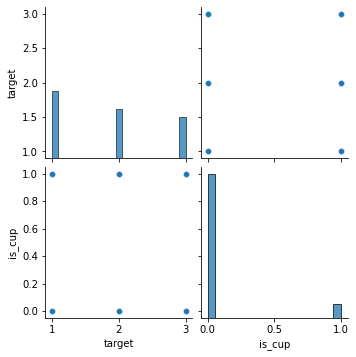

In [125]:
sns.pairplot(train[['target', 'is_cup']])

In [349]:
# #i'll ignore to ids.
# f,ax = plt.subplots(figsize=(12,10))
# sns.heatmap(train.iloc[:,2:].corr(),annot=True, linewidths=.1, fmt='.1f', ax=ax)

# plt.show()

In [77]:
# sns.barplot(x='target',  y='home_team_history_rating_1', data=train)
# plt.show()

In [78]:
# sns.barplot(x='target',  y='home_team_history_opponent_rating_1', data=train)
# plt.show()

In [79]:
# df = train[['target', 'is_cup'] + home_rating_columns + home_opponent_rating_columns + away_rating_columns + away_opponent_rating_columns + goal]

# sns.pairplot(df)
# plt.show()


In [80]:
# df = train[['target','home_team_history_rating_1','home_team_history_opponent_rating_1','home_team_history_goal_1','home_team_history_opponent_goal_1', 'home_team_name']]

# sns.pairplot(df)
# plt.show()


In [81]:
# sns.barplot(x='target',  y='home_team_history_is_play_home_2', data=train)
# plt.show()

In [82]:
# test.info()

# **Model Develope**

In [80]:
train[datees].max()

NameError: name 'datees' is not defined

In [121]:
train['match_date'].median()

Timestamp('2020-10-24 13:00:00')

In [120]:
train['date'].min()

Timestamp('2019-12-01 00:45:00')

In [151]:
validation=0

In [152]:
# validation = train[descr+home_team_history+away_team_history]
validation = train[['target', 'home_team_name', 'away_team_name', 'date', 'home_goal', 'away_goal', 'away_rating', 'home_rating'] + datees]

In [153]:
# is_play_home = [h for h in validation.columns if 'is_play_home' in h][:]

In [154]:
# for i in validation.columns:    
#     if 'is_play_home' in i:
#         validation.drop(i, axis=1, inplace=True)            

In [155]:
len(validation.columns)

29

In [156]:
val_train = validation[validation['date'].dt.year <= 2020]
val_test = validation[validation['date'].dt.year >= 2021]

In [157]:
len(val_train.columns)

29

In [158]:
val_train.shape

(52338, 29)

In [159]:
val_test.shape

(22583, 29)

In [160]:
validation[['date']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74921 entries, 0 to 110937
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    74921 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.1 MB


In [161]:
missing_values_table(validation)

Your selected dataframe has 29 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [162]:
# for i in val_train.columns:
#     if 'match_date' in i:
#         val_train.drop(i, axis=1, inplace=True)
#         val_test.drop(i, axis=1, inplace=True)
val_test.drop('date', axis=1, inplace=True)
val_train.drop('date', axis=1, inplace=True)

C:\Users\Ameri\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [163]:
x_val_train = val_train.loc[:, val_train.columns != 'target']
x_val_test = val_test.loc[:, val_train.columns != 'target']

y_val_train = val_train['target']
y_val_test = val_test['target']

In [164]:
# x_train = train.loc[:, val_train.columns != 'target']
# x_test = test.loc[:, val_train.columns != 'target']

In [58]:
# test.columns

NameError: name 'test' is not defined

In [166]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_val_train, y_val_train)
y_pred = clf.predict(x_val_test)
print('Naive Bayes classifier for Multi Nomial accuracy: {:.4f}'.format(accuracy_score(y_val_test, y_pred)))

Naive Bayes classifier for Multi Nomial accuracy: 0.4171


In [167]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [168]:
x_val_train.isna().sum().sum()

0

In [169]:
gnb.fit(x_val_train, y_val_train)

GaussianNB()

In [170]:
y_pred = gnb.predict(x_val_test)
print('Naive Bayes classifier for Gaussian Nomial accuracy: {:.4f}'.format(accuracy_score(y_val_test, y_pred)))

Naive Bayes classifier for Gaussian Nomial accuracy: 0.3542


In [171]:
print('MAE: ', metrics.mean_absolute_error(y_val_test , y_pred))
print('MSE: ', metrics.mean_squared_error(y_val_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_val_test, y_pred)))

MAE:  0.953372005490856
MSE:  1.568436434486118
RMSE:  1.2523723226285854


In [172]:
y_pred[:5]

array([1, 1, 2, 2, 1], dtype=int64)

In [173]:
y_val_test.head()

77693    1
77696    3
77705    2
77706    2
77710    3
Name: target, dtype: int64

In [174]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [175]:
lr = LinearRegression()
lr.fit(x_val_train, y_val_train)
y_pred = lr.predict(x_val_test)

print('MAE: ', metrics.mean_absolute_error(y_val_test , y_pred))
print('MSE: ', metrics.mean_squared_error(y_val_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_val_test, y_pred)))

MAE:  0.6863002552987505
MSE:  0.6442861091065732
RMSE:  0.80267434810549


In [176]:
from sklearn.tree import DecisionTreeClassifier

dml = DecisionTreeClassifier()
dml.fit(x_val_train, y_val_train)
y_pred = dml.predict(x_val_test)
print("Decision Tree Classifier accuracy: {:.4f}".format(accuracy_score(y_val_test,y_pred)*100))

Decision Tree Classifier accuracy: 37.4308


In [177]:
from sklearn.ensemble import RandomForestClassifier
randomForest= RandomForestClassifier(n_estimators=100)
randomForest.fit(x_val_train, y_val_train)
y_pred = randomForest.predict(x_val_test)
print('Random Forest Classifier accuracy: {:.4f}'.format(accuracy_score(y_val_test, y_pred)*100))

Random Forest Classifier accuracy: 43.9578


In [221]:
from sklearn.ensemble import RandomForestRegressor

In [222]:
randomForest= RandomForestRegressor(n_estimators=100)
randomForest.fit(x_val_train, y_val_train)
y_pred = randomForest.predict(x_val_test)
# print('Random Forest Classifier accuracy: {:.4f}'.format(accuracy_score(y_val_test, y_pred)*100))

In [228]:
np.sqrt(metrics.mean_squared_error(y_val_test, y_pred))

0.8128962273282786

In [229]:
y_pred.astype(int)

array([1, 1, 2, ..., 1, 1, 1])

In [230]:
y_val_test.head()

77693    1
77705    2
77706    2
77710    3
77711    1
Name: target, dtype: int64

In [235]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

In [236]:
knn_model.fit(x_val_train, y_val_train)

KNeighborsClassifier()

In [237]:
y_pred = knn_model.predict(x_val_test)
print("KNN Classification accuracy: {:.4f}".format(accuracy_score(y_val_test,y_pred)*100))

KNN Classification accuracy: 40.2573


In [275]:
from sklearn.linear_model import LogisticRegression

In [276]:
# lr = LogisticRegression(C=0.001,penalty='l2',solver='lbfgs')

In [277]:
# lr.fit(x_val_train, y_val_train)

In [278]:
# print("LogisticRegression accuracy: {:.4f}".format(accuracy_score(y_val_test,y_pred)*100))

In [242]:
from sklearn.neural_network import MLPClassifier
nn= MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
nn.fit(x_val_train, y_val_train)
y_pred = nn.predict(x_val_test)
print('neural_network Classifier accuracy: {:.4f}'.format(accuracy_score(y_val_test, y_pred)*100))

neural_network Classifier accuracy: 42.6809


C:\Users\Ameri\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


# model on test.csv

In [124]:
# randomForest= RandomForestClassifier(n_estimators=100)
# randomForest.fit(x_val_train, y_val_train)
# y_pred = randomForest.predict(x_val_test)
# print('Random Forest Classifier accuracy: {:.4f}'.format(accuracy_score(y_val_test, y_pred)*100))

In [125]:
train.to_csv('T.csv',index=False)

In [134]:
train[home_team_history].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110937 entries, 0 to 110937
Data columns (total 70 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   home_team_history_is_play_home_1      110937 non-null  float64
 1   home_team_history_is_play_home_2      110937 non-null  float64
 2   home_team_history_is_play_home_3      110937 non-null  float64
 3   home_team_history_is_play_home_4      110937 non-null  float64
 4   home_team_history_is_play_home_5      110937 non-null  float64
 5   home_team_history_is_play_home_6      110937 non-null  float64
 6   home_team_history_is_play_home_7      110937 non-null  float64
 7   home_team_history_is_play_home_8      110937 non-null  float64
 8   home_team_history_is_play_home_9      110937 non-null  float64
 9   home_team_history_is_play_home_10     110937 non-null  float64
 10  home_team_history_is_cup_1            110937 non-null  float64
 11  

In [131]:
train[['home_team_coach_id', 'away_team_coach_id']] = train[['home_team_coach_id', 'away_team_coach_id']].astype(int)

In [135]:
train[home_team_history] = train[home_team_history].astype(int)

In [136]:
train[away_team_history] = train[away_team_history].astype(int)

In [137]:
train.shape

(110937, 149)

In [139]:
design_report = ProfileReport(train[descr + home_team_history])
design_report.to_file(output_file='report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\Ameri\anaconda3\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


KeyboardInterrupt: 

In [148]:
# create correlation matrix with abs values
corr_matrix = train[descr].corr().abs()

# change this value as needed, if 0.5 does not work for your scenario
threshold = 0.5

# filtered_corr_df = corr_matrix[(corr_matrix >= threshold) & (corr_matrix != 1.000)] 

plt.figure(figsize=(30,10))
sns.heatmap(corr_matrix, annot=True, cmap="Reds")
plt.show()


C:\Users\Ameri\AppData\Local\Temp/ipykernel_6924/4229412901.py:11: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [3]:
df=pd.DataFrame({"A":[5,3,None,4],
                 "B":[None,2,4,3],
                 "C":[4,3,8,5],
                 "D":[5,4,2,None]})

In [4]:
df


,A,B,C,D
0,5.0,NaN,4,5.0
1,3.0,2.0,3,4.0
2,NaN,4.0,8,2.0
3,4.0,3.0,5,NaN


In [5]:
df.ffill(axis = 0)

,A,B,C,D
0,5.0,NaN,4,5.0
1,3.0,2.0,3,4.0
2,3.0,4.0,8,2.0
3,4.0,3.0,5,2.0


In [9]:
df = df.ffill(axis = 1)

In [10]:
df

,A,B,C,D
0,5.0,5.0,4.0,5.0
1,3.0,2.0,3.0,4.0
2,NaN,4.0,8.0,2.0
3,4.0,3.0,5.0,5.0


In [1]:
import pandas as pd
df = pd.DataFrame( {'Symbol':['A','A','A'] , 'Date':['02/20/2015','01/15/2016','08/21/2015']})
df

,Symbol,Date
0,A,02/20/2015
1,A,01/15/2016
2,A,08/21/2015


In [9]:
df['Date'] = pd.to_datetime(df.Date)
df.sort_values('Date').groupby(['Symbol'])

,Date
Symbol,
A,2015-02-20
